## Задача 6. Стохастическая матрица и собственное значение равное 1.



Утверждение. 
Пусть дана матрица $А$, в которой элементы неотрицательны и сумма в каждой строке равна $1 .$ Тогда 1 максимальное собственное значение такой матрицы.

Доказательство.
- Возьмём вектор $ \mathrm{v} $ из всех 1 и вычислим $ Av$.
- В силу равенства 1 суммы элементов в каждой строке $ Av$ также будет вектором из всех $1 .$
- Значит вектор $v$ собственный вектор для собственного значения 1
- Теперь воспользуемся теоремой Гершгорина: все собственные значения лежат в объединении кругов с центром в точках \$а_\{ii\}\$ и радиусом \$1 - а_\{ii\}\$
- Значит ни один из шаров не имеет точек расположенных дальше 1 и -1
- А значит и все собственные значения по модулю меньше 1

Сгенерируйте случайным образом много таких матриц и для каждой проверьте утверждение. Нарисуйте круги Гершгорина и собственные значения, воспользовавшись программой из документа семинара.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_mat(n):
    A = np.random.random((n,n))
    A1 = np.linalg.norm(A, axis=1)
    A /= A1.reshape((-1, 1))
    # print(A)
    # print(np.linalg.norm(A, axis=1))
    return A

A = gen_mat(5)

In [3]:
flag = True
for i in range(100):
    A = gen_mat(10)
    vals = np.linalg.eigvals(A)
    if np.all(vals > 1): 
        print(vals)
        print('False')
        flag = False
        break
if flag: print('True')
    # print(vals)

True


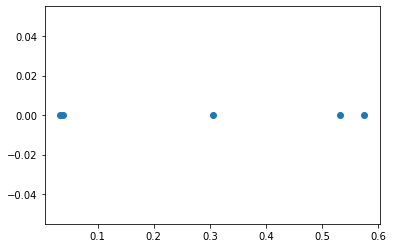

In [4]:
A = gen_mat(5)
xg = np.diag(A).real
yg = np.diag(A).imag
fig = plt.figure()
plt.scatter(xg, yg)
plt.show()

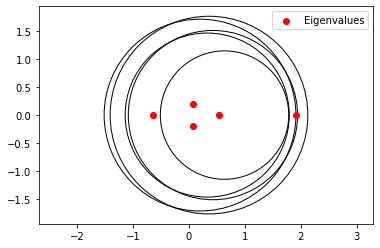

In [10]:
n = 5
fig = plt.figure()
ax = fig.add_subplot(111)
A = gen_mat(n)
xg = np.diag(A).real
yg = np.diag(A).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(A)
for i in range(n):
    rg[i] = np.sum(np.abs(A[i, :])) - np.abs(A[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
plt.axis('equal')
plt.legend()
plt.show()

# Задача 7.  PageRank и степенные итерации.


Обычно вычисление собственных значений и собственных векторов необходимо для изучения
- вибраций в механических структурах
- снижения сложности моделей сложных систем 

Более половины вычислительных мощностей в мире тратится на решение задач такого типа для задач.

Одна из самых известных задач о вычислении собственных векторов - задача о ранжировании $n$ веб-страниц (Google PageRank). Подход, который вам нужно будет реализовать в этой задаче, был одним из главных в работе Google на раннем этапе.

Всё, что мы собираемся использовать - структуру взаимных ссылок между страницами. PageRank определяется рекурсивно: важность $i$-й страницы определяется как среднее значение важностей всех страниц, которые ссылаются на $i$-ю. Обозначим важность $i$-й страницы $p_{i}$, тогда это определение может быть записано в виде линейной системы:
$$
p_{i}=\sum_{j} \frac{p_{j}}{L(j)} l_{i j}
$$
где $l_{i j}=1$ если $j$-я страница ссылается на $i$-ю (в противном случае $\left.l_{i j}=0\right)$, а $L(j)-$ количество исходящих ссылок со страницы $j$. Система может быть переписана в виде задачи на собственное значение:
$$
p=G p, \quad G_{i j}=\frac{l_{i j}}{L(j)}
$$
Если в графе есть 'подвешенные' узлы (все элементы какого-то столбца равны нулю), то весь столбед заполняется числом $1 / n$. Наконец, вводится параметр $0<\beta<1$ так что матрица $G$ заменяется на
$$
G \rightarrow \beta G+\frac{1-\beta}{n} e e^{T}
$$
где $e$ - вектор, состоящий из единиц. Обратите внимание, что задача свелась к нахождению собственного вектора $p$ матрицы $G$, отвечающего собственному значению $1 .$ Можно показать, что 1 - максимально возможное собственное значение матрицы $G .$
- Придумайте самостоятельно небольшой граф связности ( 10 узлов), постройте соответствуюшие матрицы $l$ и $G$ и найдите численно собственный вектор, отвечающий PageRank.



- Скачайте файл, в котором представлен ориентированный граф, узлы которого составляют страницы stanford.edu, а направленные рёбра - ссылки между ними (граф задан матрицей смежности $l$ ). Распакуйте архив и загрузите его:
- Найдите PageRank для матрицы из предыдущего пункта. Для этого реализуйте степенную итерацию для нахождения собственного вектора, отвечающего максимальному собственному значению $G .$ Возьмите $\beta=0.8$
- Итерируйте до тех пор, пока 1-норма изменения вектора-кандидата не станет меньше $10^{-4}$. Сколько итераций понадобилось?
- Какому собственному значению отвечает найденный вектор и у какого узла наибольший РаgеRапk?
- Докажите, что 1 - максимально возможное собственное значение матрицы G.

# Задача 8. Метод обратных итераций и итерации Рэлея.


Напишите программу для нахождения минимального по модулю собственного значения и соответствующего собственного вектора симметричной матрицы при использовании обратных итераций Рэлея. С её помощью решите задачу для 
- матрицы Гильберта
- матрицы Лемера
- матрицы Паскаля 
- для симметричной трёхдиагональной матрицы, где на главной диагонали стоят 2, а на боковых диагоналях -1.

Напишите на основе этой программы функцию, которая ищет ближайшее к заданному числу собственное значение. 


Для перечисленных матриц вывести ответ для n = 2, 3, ... 10.

Матрицей Лемера называют матрицу, у которой элементы равны:

$a_{i j}=\frac{\min (i, j)}{\max (i, j)} $ (нумерация от 1)

Матрицей Паскаля называют матрицу, у которой элементы равны:

$S_{i j}=\left(\begin{array}{l}
n \\
r
\end{array}\right)=\frac{n !}{r !(n-r) !}, \quad n=i+j, \quad r=i$  (нумерация от 0) 

Примечание. Для некоторых матриц можно использовать также выражение обратной матрицы в явном виде.

 Матрица, обратная к матрице Гильберта, может быть выражена в явном виде через биномиальные коэффициенты:

$$
\left(H^{-1}\right)_{i j}=(-1)^{i+j}(i+j-1)\left(\begin{array}{c}
n+i-1 \\
n-j
\end{array}\right)\left(\begin{array}{c}
n+j-1 \\
n-i
\end{array}\right)\left(\begin{array}{c}
i+j-2 \\
i-1
\end{array}\right)^{2}
$$

где $n$ - порядок матрицы. Таким образом, элементы обратной матрицы $H^{-1}-$ целые числа.  

In [3]:
import math

def CNK(n,k):
    return int((1.0*np.math.factorial(n))/(1.0*np.math.factorial(n-k)*np.math.factorial(k)))

def Hilb(n):
    return np.fromfunction(lambda i, j: 1.0/(i+j+1.0), (n, n), dtype=float)\

def HilbInv(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = ((-1.0)**(i+j))*(i+j+1)*CNK(n+i,n-j-1)*CNK(n+j,n-i-1)*(CNK(i+j,i)**2)
    return A

def Lem(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = (1.0*min(i+1,j+1))/(1.0*max(i+1,j+1))
    return A

def Pask(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = CNK(i+j,i)
    return A

def Diag3(n):
    A = np.zeros((n,n))
    A += 2*np.diag(np.ones(n))
    A -= np.diag(np.ones(n-1),1)
    A -= np.diag(np.ones(n-1),-1)
    # np.zeros((n,n))+2*np.diag(np.ones(n))-np.diag(np.ones(n),-1)-np.diag(np.ones(n),1)
    return A

In [4]:
Diag3(2)

array([[ 2., -1.],
       [-1.,  2.]])

In [18]:
def get_val(A, x0, err=1e-8, max_it=1000):
    val = x0
    n = A.shape[0]
    vec = np.random.random((n,1))
    # print(vec, val)
    for i in range(max_it):
        B = np.linalg.inv(A-val*np.eye(n))
        vec_ = B@vec/np.linalg.norm(B)
        # print(A@vec.reshape((-1,1)))
        val_ = np.sum(A@vec.reshape((-1,1))*vec)/np.sum(vec**2)
        # print(vec_, val_)
        if np.abs(val_ - val) < err:
            vec[:] = vec_[:]
            val = val_
            break
        vec[:] = vec_[:]
        val = val_
    return val, vec

def count_first_vec(A):
    B = np.linalg.norm(A)
    print(B)
    x = np.linspace(-B, B, 10)
    vals, vects = [], []
    for i in x:
        val, vec = get_val(A, i)
        vals.append(val)
        vects.append(vec)
    return vals, vects

In [19]:
def count_min(gen_mat,ns):
    for n in ns:
        A = gen_mat(n)
        lam, _ = count_first_vec(A)
        print(np.linalg.eigvals(A))
        print(lam)
        # print(f"Для n={n}; min_lambda={lam}")
    # return 

In [20]:
ns = np.arange(2,5,1)
# print(Diag3(2))
# f = [Diag3, Lem, Pask, Hilb]
f = [Lem]
for f_ in f:
    print(f'for {f_.__name__}')
    count_min(f_, ns)

for Lem
1.5811388300841898
[1.5 0.5]
[1.5000000000000002, 1.5, 1.4999999999999998, 1.4999999999999998, 1.4999999999999998, 1.5000000000000002, 1.4999999999903557, 1.4999999999999998, 1.5, 1.5]
2.1473497877875207
[2.0124456  0.68553484 0.30201957]
[2.012445597085854, 0.6855348356249379, 2.0124455970858546, 2.0124455970858546, 2.012445597085854, 2.012445597085854, 0.6855348356247624, 2.0124455970858537, 2.0124455970858546, 2.012445597085854]
2.7131367660166177
[2.53616247 0.84822916 0.40783288 0.20777549]
[0.8482291554779128, 2.5361624744862006, 0.8482291554779129, 2.536162474486201, 0.40783288411787133, 0.40783288411787505, 0.8482291554779129, 2.536162474486201, 2.5361624744862006, 2.536162474486201]


# Задача 9.  PageRank с помощью библиотек на Python.

Мы можем вычислить PageRank с помощью библиотек на Python. Будем использовать бибилотеку networkx для работы с графами, она может быть установлена с помощью следующей команды

conda install networkx

Возьмём простой пример графа Zachary karate club. Этот граф был собран вручную в 1977, и является классическим графом для анализа соцсетей.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club  

  

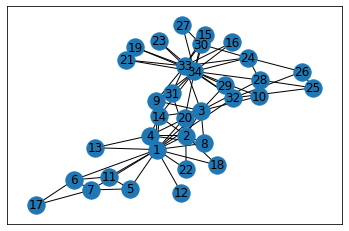

In [87]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
kn = nx.read_gml('graph.gml.txt')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph 

Сейчас мы можем вычислить PageRank, используя функцию, встроенную в NetworkX. Мы также изобразим вершины графа пропорционально тому, наскольку они важны в смысле величины PageRank'a.

  

In [80]:
# !pip install scipy -U
!pip install networkx -U

In [88]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

Самостоятельно проделайте это всё для страниц stanford.edu

In [93]:
import networkx as nx
G = nx.Graph()
f = open("web-Stanford.txt","r")
N = 281903
start = 4
end = len(f)+1
#end = 100
nodes = f[2].replace("\n","").split(" ")[2]
print(nodes)
G.add_nodes_from(list(np.arange(1,int(nodes)+1)))
for i in tqdm(range(len(f[start:end]))):
    curr = f[i+start].replace("\n","").split("\t")
    a, b = int(curr[0]), int(curr[1])
    #A[a-1][b-1]=True
    #print(a,b)
    G.add_edge(a,b)
#nx.draw_networkx(G)

TypeError: object of type '_io.TextIOWrapper' has no len()

# Задача 10. Вunch-Nielsen-Sorensen formula.

Рассмотрите диагональную матрицу $D$ размера $n \times n$ и вектор-столбец $u$. Выберите $D$ и $u$ случайным образом (сгенерировав их элементы из стандартного нормального распределения) и найдите минимальное собственное значение и соответствующий собственный ему собственный вектор матрицы
$$
A=D+\frac{u u^{T}}{u^{T} u}
$$

Рассмотрите случаи $n=10^{2}$ и $n=10^{4}-$ во втором случае Вам, возможно, пригодится Вunch-Nielsen-Sorensen formula  

Let $\lambda_{i}$ denote the eigenvalues of $A$ and $\tilde{\lambda}_{i}$ denote the eigenvalues of the updated matrix $\tilde{A}=A+v v^{T} .$ In the special case when $A$ is diagonal, the eigenvectors $\tilde{q}_{i}$ of $\tilde{A}$ can be written

$$
\left(\tilde{q}_{i}\right)_{k}=\frac{N_{i} v_{k}}{\lambda_{k}-\tilde{\lambda}_{i}}
$$

where $N_{i}$ is a number that makes the vector $\tilde{q}_{i}$ normalized. 

# Задача 11. Матрица вида диагональная матрица плюс матрица малого ранга.

- Собственные значения матрицы вида
$$
D+\rho u u^*
$$
вычислить не так просто!
- Характеристический многочлен имеет вид
$$
\operatorname{det}\left(D+\rho u u^*-\lambda I\right)=\operatorname{det}(D-\lambda I) \operatorname{det}\left(I+\rho(D-\lambda I)^{-1} u u^*\right)=0
$$
Тогда (докажите!!)
$$
\operatorname{det}\left(I+\rho(D-\lambda I)^{-1} u u^*\right)=1+\rho \sum_{i=1}^n \frac{\left|u_i\right|^2}{d_i-\lambda}=0
$$
Подсказка: найдите $\operatorname{det}\left(I+w u^*\right)$ используя два факта:
- $\operatorname{det}(C)=\prod_{i=1}^n \lambda_i(C)$
- $\operatorname{trace}(C)=\sum_{i=1}^n \lambda_i$. 



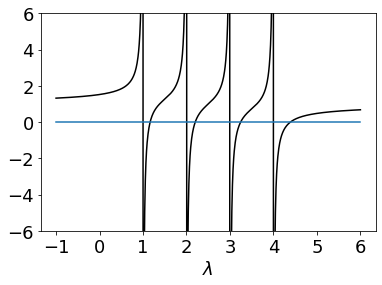

In [4]:
import numpy as np

lm = [1, 2, 3, 4]
M = len(lm)
D = np.array(lm)
a = np.min(lm)
b = np.max(lm)
t = np.linspace(-1, 6, 1000)
u = 0.5 * np.ones(M)
rho = 1
def fun(lam):
    return 1 + rho * np.sum(u**2/(D - lam))
res = [fun(lam) for lam in t]
plt.plot(t, res, 'k')
plt.plot(t, np.zeros_like(t))
plt.ylim([-6, 6])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
_ = plt.xlabel("$\lambda$", fontsize=18)

Эта функция имеет только один корень на каждом отрезке $\left[d_i, d_{i+1}\right]$

Мы показали справедливость теоремы Коши о чередовании (что происходит с собственными числами после внесения возмущения ранга 1).

Сформулируйте самостоятельно и докажите эту теорему.

# Задача 12. Нелинейное характеристическое уравнение.

Решите нелинейное уравнение для $\lambda$

$$
1+\rho \sum_{i=1}^n \frac{\left|u_i\right|^2}{d_i-\lambda}=0
$$

Указания:

- Метод Ньютона не сработает (изобразите касательные к графику , можно использовать графики из прошлой задачи).
- Заметим, что метод Ньютона - это по сути линейная аппроксимация функции $f(\lambda)$ на каждой итерации.
- Лучше аппроксимировать с помощью гиперболы вида:
$$
f(\lambda) \approx c_0+\frac{c_1}{d_i-\lambda}+\frac{c_2}{d_{i+1}-\lambda}
$$
- Для вычисления коэффициентов нам нужно вычислить $f(\lambda)$ и $f^{\prime}(\lambda)$ в некоторых точках.
- После чего получить апроксимацию из решения квадратного уравнения

# Задача 13. Теорема Лёвнера (Charles Loewner).

## Докажите теорему Лёвнера.

**Важный недостаток метода "разделяй и властвуй"**

- Устойчивость: этот метод игнорировали долгое время из-за неустойчивого вычисления собственных векторов.
- Нам нужно вычислить собственные векторы матрицы $D+\rho u u^*$.
- Точное выражение для собственных векторов $v_i$, для которых найдены собственные значения $\alpha_i$ :
$$
\left(D+\rho u u^*\right) v_i=\alpha_i v_i \quad\left(D-\alpha_i I\right) v_i+\rho\left(u^* v_i\right) u=0
$$
То есть $v_i \in \operatorname{span}\left(\left\{\left(D-\alpha_i I\right)^{-1} u\right\}\right)$

**Причины неустойчивости:**
- если есть два близких собственных числа $\alpha_i$ и $\alpha_{i+1}$, то соответствующие векторы $\left(D-\alpha_i I\right)^{-1} u$ и $\left(D-\alpha_{i+1} I\right)^{-1} u$ будут близки, хотя долждны быть ортогональны
- если $\alpha_i$ и $\alpha_{i+1}$ очень близки, то они близки к числу $d_i$ между ними, то есть матрицы $D-\alpha_i I$ и $D-\alpha_{i+1} I$ близки к вырожденным 

**Теорема Лёвнера (Charles Loewner)** 

- Решение проблемы неустойчивости можно получить с помощью теоремы Лёвнера:


Если $\alpha_i$ и $d_i$ удовлетворяют теореме о чередовании
$$
d_n<\alpha_n<\ldots<d_{i+1}<\alpha_{i+1} \ldots
$$
Тогда существует вектор $\widehat{u}$ такой что $\alpha_i$ - точное собственное значение матрицы
$$
\widehat{D}=D+\widehat{u} \widehat{u}^*
$$
и
$$
\widehat{u}_i^2=\frac{\prod_{j=1}^n\left(\alpha_j-d_i\right)}{\prod_{j=1, j \neq i}^n\left(d_j-d_i\right)}
$$
- Использование вектора $\widehat{u}$ вместо $u$ даёт устойчивое вычисление собственного вектора!
- Таким образом, сначала вычисляются собственные значения, затем $\widehat{u}$ и только потом собственные векторы. 

# Задача 14. Верхне-гессенберговая форма

Напишите функцию, которая решает СЛАУ методом отражений Хаусхолдера.
И вторую функцию, которая приводит матрицу к верхне-гессенберговой форме.

## Пример работы алгоритма.

Решим для примера систему уравнений "вручную" методом отражений.

Система уравнений:

$$
\left\{\begin{array}{l}
x_1+x_2-x_3=1 \\
x_1-2 x_2+x_3=3 \\
3 x_1+2 x_2+x_3=4
\end{array}\right.
$$

Расширенная матрица системы:

$A^{(0)}=\left|\begin{array}{lrrr}1.00000 & 1.00000 & -1.0000 & 1.0000 \\ 1.0000 & -2.0000 & 1.0000 & 3.0000 \\ 3.0000 & 2.0000 & 1.0000 & 4.0000\end{array}\right|$
Шar $1, k=1$
$$
\begin{aligned}
&s=\left|\begin{array}{l}
1.0000 \\
1.0000 \\
3.0000
\end{array}\right|, \quad h=\left|\begin{array}{l}
1.0000 \\
0.0000 \\
0.0000
\end{array}\right| \\
&d=\sum_{i=1}^3 s_i^2=1^2+1^2+3^2=11, \quad b=\operatorname{sign}\left(a_{1,1}^{(0)}\right) \sqrt{d}=3.3166, \quad p=\sqrt{2(11+3.3166 \cdot 1.0000)}=5.3510
\end{aligned}
$$


\begin{aligned}
&w=\frac{1}{p}(s+b h)=\frac{1}{5.3510} \cdot\left(\left|\begin{array}{c}
1.0000 \\
1.0000 \\
3.0000
\end{array}\right|+3.3166 \cdot\left|\begin{array}{l}
1.0000 \\
0.0000 \\
0.0000
\end{array}\right|\right)=\left|\begin{array}{l}
0.8067 \\
0.1869 \\
0.5606
\end{array}\right| \\
&
\end{aligned}




\begin{aligned}
&U=E-2 w w^T=\left|\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right|-2 \cdot\left|\begin{array}{ll}
0.8067 \\
0.1869 \\
0.5606
\end{array}\right| \cdot|0.80670 .1869 \quad 0.5606|=\left|\begin{array}{rrr}
-0.3015 & -0.3015 & -0.9045 \\
-0.3015 & 0.9302 & -0.209 \\
-0.9045 & -0.2095 & 0.3714
\end{array}\right|, \\
&
\end{aligned}

$$A^{(1)}=U^{(1)} \cdot A^{(0)}=\left|\begin{array}{rrrr}
-0.3015 & -0.3015 & -0.9045 \\
-0.3015 & 0.9302 & -0.2095 \\
-0.9045 & -0.2095 & 0.3714
\end{array}\right| \cdot\left|\begin{array}{rrrr}
1.0000 & 1.00000 & -1.00000 & 1.0000 \\
1.0000 & -2.0000 & 1.0000 & 3.0000 \\
3.0000 & 2.0000  & 1.0000 & 4.0000
\end{array}\right| 
=\left|\begin{array}{rrrr}
-3.3166 & -1.5076 & -0.9045 & -4.8242 \\
0.0000 & -2.5809 & 1.0221 & 1.6508 \\
0.0000 & 0.2573 & 1.0663 & -0.0477
\end{array}\right|$$



Шаг $2, k=2$
$$
\begin{aligned}
&s=\left|\begin{array}{r}
0.0000 \\
-2.5809 \\
0.2573
\end{array}\right|, h=\left|\begin{array}{l}
0.0000 \\
1.00000 \\
0.0000
\end{array}\right|, \\
&d=(-2.5809)^2+(0.2573)^2=6.7273, \quad b=\operatorname{sign}\left(a_{2,2}^{(1)}\right) \sqrt{d}=-2.5937, \\
&p=5.1810, w=\frac{1}{5.1810} \cdot\left(\left|\begin{array}{r}
0.0000 \\
-2.5809 \\
0.2573
\end{array}\right|-2.5937 \cdot\left|\begin{array}{l}
0.0000 \\
1.0000 \\
0.0000
\end{array}\right|\right)=\left|\begin{array}{r}
0.0000 \\
-0.9988 \\
0.0497
\end{array}\right|,
\end{aligned}
$$ 

$$U=\left|\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right|-2 \cdot\left|\begin{array}{rrr}
0.0000 \\
-0.9988 \\
0.0497
\end{array}\right| \cdot|0.0000-0.99880 .0497|=\left|\begin{array}{rrr}
1.0000 & 0.0000 & -0.0000 \\
0.0000 & -0.9951 & 0.0992 \\
-0.0000 & 0.0992 & 0.9951
\end{array}\right| \text {, } $$

$$A^{(2)}=U^{(2)} \cdot A^{(1)}=  \left|\begin{array}{rrrr}
-3.3166 & -1.5076 & -0.9045 & -4.8242 \\
-0.0000 & 2.5937 & -0.9113 & -1.6473 \\
0.0000 & 0.0000 & 1.1625 & 0.1162
\end{array}\right|$$

По полученной расширенной матрице А ${ }^{(2)}$ запишем систему уравнений, эквивалентную исходной системе:
$$
\left\{\begin{array}{l}
-3.3166 \cdot x_1-1.5076 \cdot x_2-0.9045 \cdot x_3=-4.8242 \\
2.5937 \cdot x_2-0.9113 \cdot x_3=-1.6473 \\
1.1625 \cdot x_3=0.1162
\end{array}\right.
$$

из третьего уравнения находим $x_3$, подставляем его во второе уравнение, находим $x_2$, подставляем х ${ }_2$ и х в первое уравнение, и находим $x_1$. Получим
$$
x_1=1.7, x_2=-0.6, x_3=0.1
$$
по ссылке (формальный параметр с префиксом var).